In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/cleaned_dataset.csv")

In [8]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,TRUE,TRUE,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,TRUE,TRUE,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,TRUE,TRUE,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,TRUE,TRUE,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,TRUE,TRUE,617259738,9.942693,Youtube


# Set style for all plots

In [9]:
sns.set(style="whitegrid")

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 1. Top 10 Most Viewed Tracks

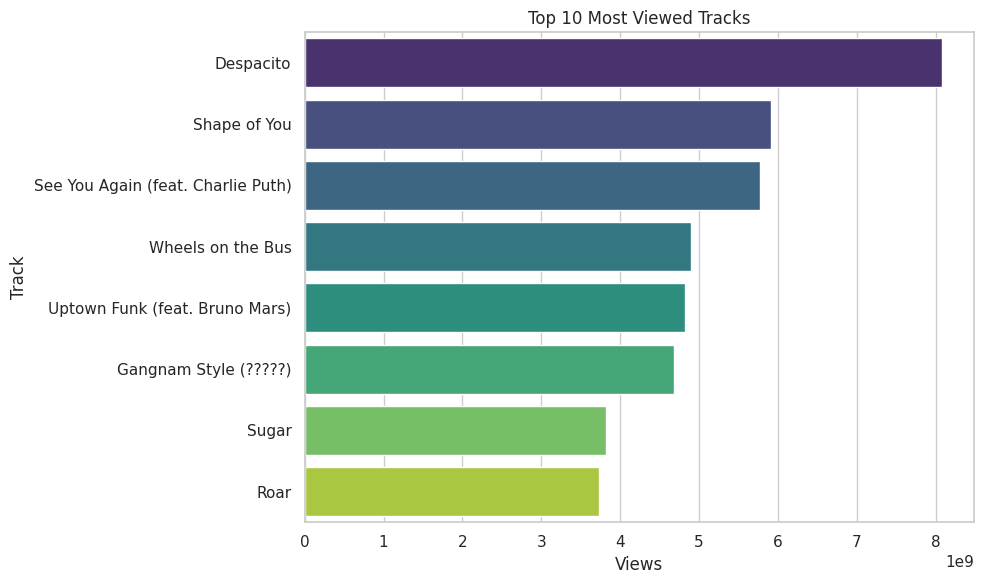

In [11]:
#(By SQL)
#SELECT track, views
#FROM spotify
#ORDER BY views DESC
#LIMIT 10;


# Top 10 Most Viewed Tracks (By Python)
top_views = df[['Track', 'Views']].sort_values(by='Views', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_views, x='Views', y='Track', palette='viridis')
plt.title('Top 10 Most Viewed Tracks')
plt.xlabel('Views')
plt.ylabel('Track')
plt.tight_layout()
plt.show()

# Average Views by Album Type

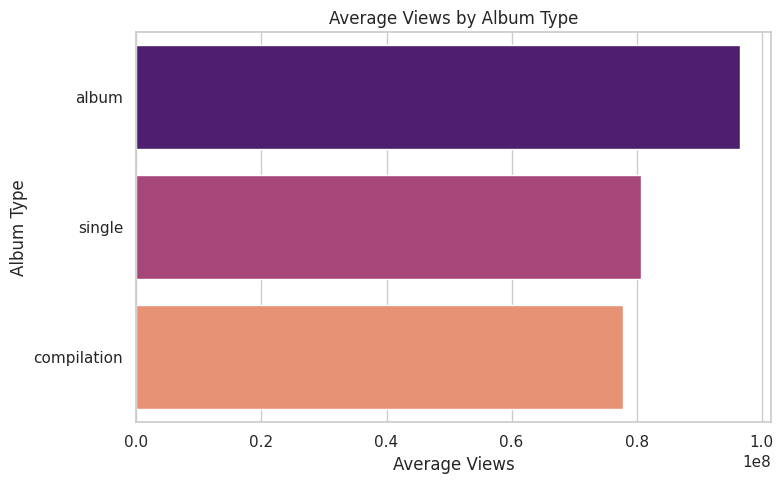

In [12]:
#SELECT album_type, AVG(views) AS avg_views
#FROM spotify
#GROUP BY album_type
#ORDER BY avg_views DESC;


# Average Views by Album Type (By Python)
avg_views_album_type = df.groupby('Album_type')['Views'].mean().reset_index().sort_values(by='Views', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_views_album_type, x='Views', y='Album_type', palette='magma')
plt.title('Average Views by Album Type')
plt.xlabel('Average Views')
plt.ylabel('Album Type')
plt.tight_layout()
plt.show()

# Distribution of Tempo

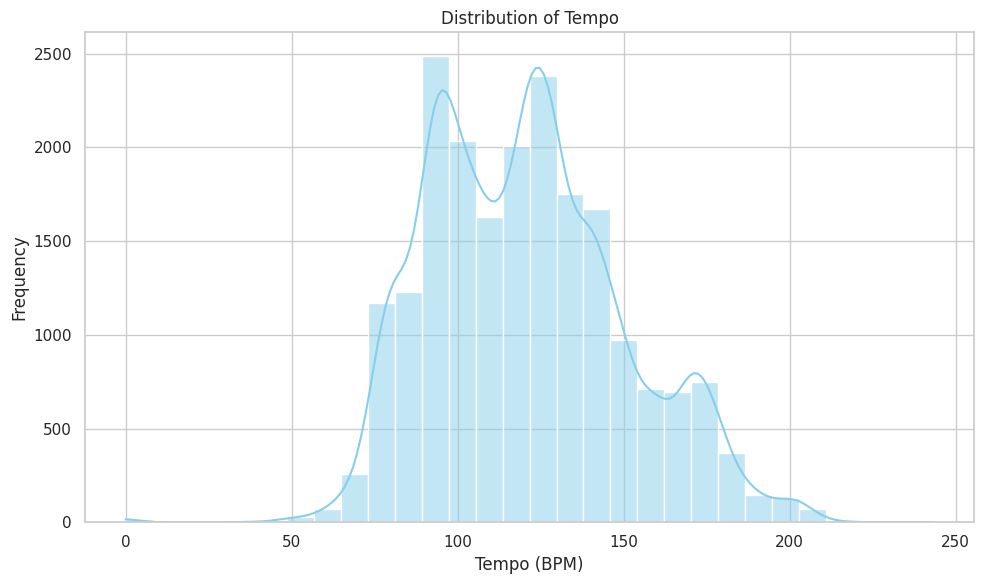

In [13]:
#SELECT
 # FLOOR(tempo / 10) * 10 AS tempo_range,
  #COUNT(*) AS frequency
#FROM spotify
#WHERE tempo IS NOT NULL
#GROUP BY tempo_range
#ORDER BY tempo_range;




# Distribution of Tempo
plt.figure(figsize=(10, 6))
sns.histplot(df['Tempo'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<h1> Correlation Heatmap of Numeric Columns <h1>


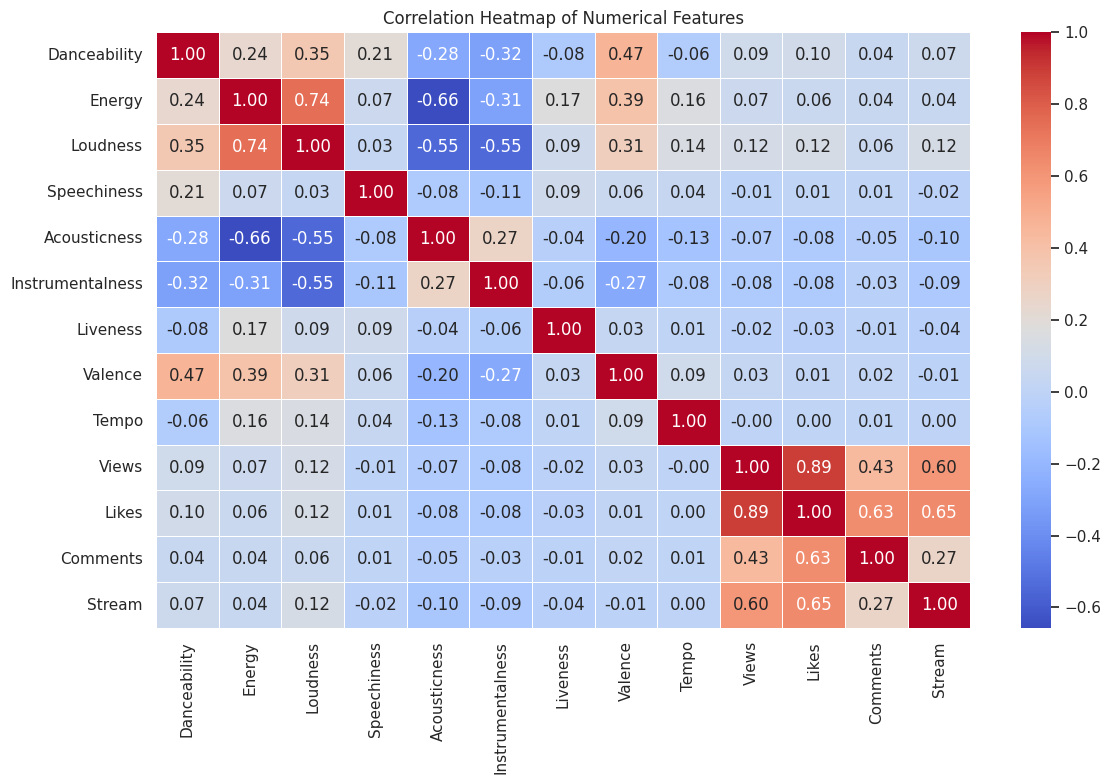

In [14]:
# Correlation Heatmap of Numeric Columns
numeric_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views',
                'Likes', 'Comments', 'Stream']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()